In [ ]:
import os
import json
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2 #필요한 라이브러리 
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import time
import math
import pandas as pd
from tqdm.notebook import tqdm

import skimage
from skimage.morphology import skeletonize
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [ ]:
'''
/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test
/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train
Ariel_Sharon
Colin_Powell
Donald_Rumsfeld
George_W_Bush
Gerhard_Schroeder
Hugo_Chavez
Tony_Blair
'''

'\n/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test\n/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train\nAriel_Sharon\nColin_Powell\nDonald_Rumsfeld\nGeorge_W_Bush\nGerhard_Schroeder\nHugo_Chavez\nTony_Blair\n'

EDA

In [ ]:
traina = pd.DataFrame({'Ariel': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Ariel_Sharon/*'))})
trainc = pd.DataFrame({'Colin': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Colin_Powell/*'))})
traind = pd.DataFrame({'Donald': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Donald_Rumsfeld/*'))})
trainw = pd.DataFrame({'George': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/George_W_Bush/*'))})
trains = pd.DataFrame({'Gerhard': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Gerhard_Schroeder/*'))})
trainh = pd.DataFrame({'Hugo': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Hugo_Chavez/*'))})
traint = pd.DataFrame({'Tony': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Tony_Blair/*'))})

In [ ]:
traina # Ariel_Sharon를 담은 데이터 프레임 

,Ariel
0,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
1,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
2,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
3,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
4,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
...,...
59,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
60,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
61,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
62,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...


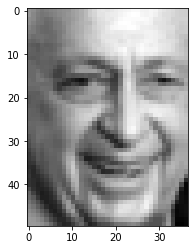

In [ ]:
img = cv2.imread(traina['Ariel'][0], 0)
plt.imshow(img, cmap='gray')

In [ ]:
img.shape

(50, 37)

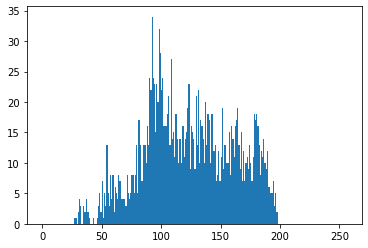

In [ ]:
#EDA1 이미지 히스토그램 방법1
plt.hist(img.ravel(), 256, [0,256]); 
plt.show()

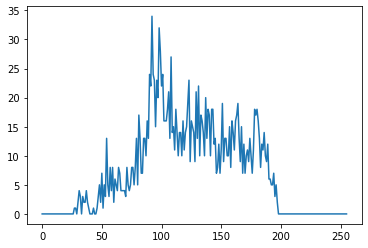

In [ ]:
#방법2 
hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

PCA - Ariel_Sharon만

In [ ]:
# Ariel PCA 
from sklearn.preprocessing import StandardScaler
n_sample = 64
n_row = 50
n_col = 37
arial= []

for i in traina.index:
  img = cv2.imread(traina['Ariel'][i], 0)
  arial.append(img)

nparial = np.array(arial) 
nparial.shape

(64, 50, 37)

In [ ]:
arialface = nparial.reshape(n_sample, n_row * n_col)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 32).fit(arialface)
x_train = pca.transform(arialface)

In [ ]:
x_train.shape

(64, 32)

In [ ]:
pca.components_.shape

(32, 1850)

In [ ]:
print(pca.explained_variance_ratio_[:5])
print(sum(pca.explained_variance_ratio_))

[0.20973238 0.16502105 0.07518768 0.06681887 0.05109878]
0.9319512310484525


In [ ]:
pca.components_[0]

array([ 0.00872672,  0.00818369,  0.00900507, ..., -0.02112437,
       -0.02967605, -0.03487957])

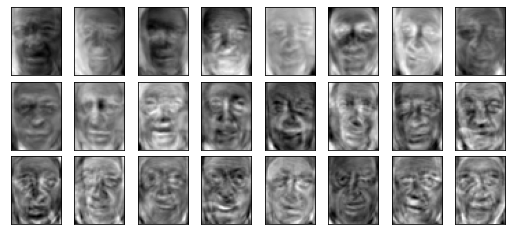

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
            subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(50, 37), cmap='gray')

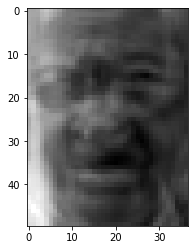

In [ ]:
eigenfaces = pca.components_.reshape((32, n_row, n_col))
loadeigen = eigenfaces[0]
plt.imshow(loadeigen, cmap='gray')

In [ ]:
# Ariel 정규화와 PCA 
n_sample = 64
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in traina.index:
  img = cv2.imread(traina['Ariel'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
x_train = pca.transform(arialface)


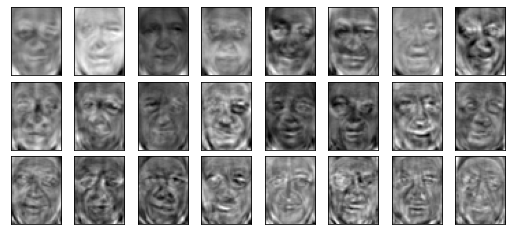

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
            subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(50, 37), cmap='gray')

In [ ]:
print(pca.explained_variance_ratio_[:5])

[0.0862767  0.08157526 0.07420732 0.05814477 0.05222371]


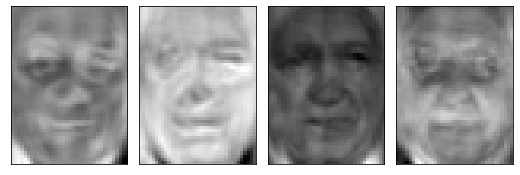

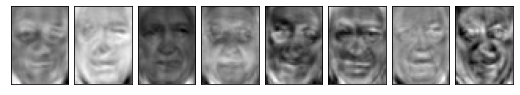

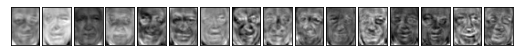

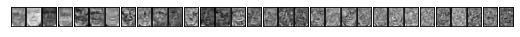

In [ ]:
#여러개 n_components
n_sample = 64
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 
num_com = [4, 8, 16, 32, 64]

for i in traina.index:
  img = cv2.imread(traina['Ariel'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 


for n in num_com:
  arialface = nparial.reshape(n_sample, n_row * n_col)
  pca = PCA(n_components = n).fit(arialface)
  x_train = pca.transform(arialface)

  fig, axes = plt.subplots(1, n, figsize=(9, 4),
            subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1))

  for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(50, 37), cmap='gray')

전체 PCA

In [ ]:
# Ariel 정규화와 PCA 
n_sample = traina.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in traina.index:
  img = cv2.imread(traina['Ariel'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
a_train = pca.transform(arialface)

In [ ]:
pca_a = pca.components_
pca_a

array([[-0.00699285, -0.01058966, -0.01417283, ..., -0.08729201,
        -0.11879612, -0.11556795],
       [ 0.01337255,  0.02763723,  0.02906639, ..., -0.12928869,
        -0.10900467, -0.08312089],
       [-0.00334498,  0.00395023,  0.01390231, ...,  0.12101174,
         0.0722753 ,  0.025543  ],
       ...,
       [ 0.01356611, -0.00170668, -0.03348627, ...,  0.02254583,
        -0.04326684, -0.03450801],
       [ 0.04405285,  0.04128844,  0.01591395, ..., -0.0715993 ,
         0.03579264,  0.09581885],
       [-0.03528976, -0.00049224,  0.0213643 , ...,  0.00287133,
         0.02859911, -0.01144954]])

In [ ]:
#Colin 정규화와 PCA 
n_sample = trainc.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in trainc.index:
  img = cv2.imread(trainc['Colin'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
c_train = pca.transform(arialface)

In [ ]:
pca_c = pca.components_
pca_c

array([[-2.67059554e-02, -3.56212001e-02, -4.45913055e-02, ...,
        -1.07654213e-02,  6.96103414e-03,  1.80461070e-02],
       [ 3.69461533e-03, -6.94140605e-03, -5.05429622e-03, ...,
        -1.56880304e-01, -1.65156790e-01, -1.46339332e-01],
       [ 7.49455588e-03,  5.19423295e-03,  7.98786647e-03, ...,
         7.73522895e-02,  4.41923782e-05, -4.68770902e-02],
       ...,
       [ 1.17969526e-02, -8.56246620e-03, -1.39085473e-02, ...,
         3.10672283e-02,  2.62116230e-02,  2.63421331e-02],
       [-3.63486052e-02, -2.94491988e-02,  1.09007011e-02, ...,
        -2.12858725e-02, -5.88862864e-02, -6.39944984e-02],
       [-5.19270843e-02, -6.34119994e-02, -5.70842795e-02, ...,
         2.60684165e-02,  4.19833227e-02,  7.04616340e-02]])

In [ ]:
#Donald_ 정규화와 PCA 
n_sample = traind.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in traind.index:
  img = cv2.imread(traind['Donald'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
d_train = pca.transform(arialface)

In [ ]:
pca_d = pca.components_
pca_d

array([[ 0.00825777,  0.00634166,  0.00348728, ...,  0.11168644,
         0.0794592 ,  0.05677962],
       [-0.02019647, -0.02795262, -0.03919935, ...,  0.04263616,
         0.05366571,  0.04277881],
       [-0.0228713 , -0.02022449, -0.0183861 , ..., -0.07811146,
        -0.07931495, -0.05905243],
       ...,
       [ 0.00164971,  0.01325556,  0.01456108, ..., -0.00750112,
        -0.01562461, -0.03888198],
       [-0.02183872, -0.01808321,  0.01533017, ..., -0.01705744,
         0.01103637,  0.05450275],
       [ 0.01900402,  0.03610753,  0.04239306, ...,  0.01462177,
         0.0022224 , -0.01145324]])

In [ ]:
#George 정규화와 PCA 
n_sample = trainw.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in trainw.index:
  img = cv2.imread(trainw['George'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
w_train = pca.transform(arialface)

In [ ]:
pca_g = pca.components_
pca_g

array([[ 0.01888928,  0.02872939,  0.03630204, ...,  0.07446196,
         0.05884904,  0.04224562],
       [-0.02117918, -0.02433968, -0.01957417, ..., -0.1265436 ,
        -0.12218803, -0.11060476],
       [-0.03376345, -0.03732119, -0.03956056, ...,  0.09028273,
         0.06879979,  0.04719327],
       ...,
       [-0.01078419,  0.00540274,  0.02364205, ...,  0.02516397,
        -0.00381936, -0.03469021],
       [-0.01369862, -0.0156902 , -0.02603178, ...,  0.05222644,
         0.01261494, -0.01152401],
       [-0.00101834, -0.02552305, -0.00936472, ...,  0.0563    ,
         0.03277187, -0.03004632]])

In [ ]:
#Gerhard 정규화와 PCA 
n_sample = trains.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in trains.index:
  img = cv2.imread(trains['Gerhard'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
s_train = pca.transform(arialface)

In [ ]:
pca_s = pca.components_
pca_s

array([[-2.06732262e-02, -2.16584206e-02, -2.33435495e-02, ...,
        -7.49346111e-02, -7.67537365e-02, -6.48237277e-02],
       [-3.21339212e-02, -3.52216485e-02, -3.51930901e-02, ...,
         2.56369280e-02,  3.72426215e-03, -1.07973606e-02],
       [-1.25384324e-02, -3.06465273e-02, -4.30668260e-02, ...,
         1.04207194e-01,  8.86266213e-02,  7.70854909e-02],
       ...,
       [-1.50941736e-02,  1.36267991e-02, -1.75370559e-03, ...,
         3.60240296e-02,  3.11513333e-02,  5.04832715e-02],
       [-8.98791597e-03, -2.02538139e-02,  1.89214039e-03, ...,
         3.14759521e-02,  3.84863128e-02,  6.41785278e-05],
       [ 4.16597496e-02,  2.31684774e-02, -4.58498010e-03, ...,
         2.56577147e-02,  2.72814767e-02, -1.48739571e-02]])

In [ ]:
#Hugo 정규화와 PCA 
n_sample = trainh.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in trainh.index:
  img = cv2.imread(trainh['Hugo'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
h_train = pca.transform(arialface)

In [ ]:
pca_h = pca.components_
pca_h

array([[ 0.0021857 ,  0.00666345,  0.02078669, ...,  0.00746086,
         0.00385189,  0.00091484],
       [-0.02638502, -0.02489779, -0.02807055, ..., -0.03534753,
        -0.02756318, -0.01476876],
       [-0.00653857,  0.0100582 ,  0.03500492, ...,  0.03977241,
         0.01257196,  0.00736532],
       ...,
       [-0.00638317, -0.0045384 , -0.01338966, ...,  0.0309873 ,
         0.03298766,  0.02491706],
       [-0.02171841, -0.04293497, -0.02486081, ...,  0.07822952,
        -0.0088257 , -0.02717568],
       [-0.00106562, -0.01811489, -0.04922065, ...,  0.01747049,
         0.05187783,  0.03480674]])

In [ ]:
#Tony 정규화와 PCA 
n_sample = traint.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in traint.index:
  img = cv2.imread(traint['Tony'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
t_train = pca.transform(arialface)

In [ ]:
pca_t = pca.components_
pca_t

array([[ 0.0021857 ,  0.00666345,  0.02078669, ...,  0.00746086,
         0.00385189,  0.00091484],
       [-0.02638502, -0.02489779, -0.02807055, ..., -0.03534753,
        -0.02756318, -0.01476876],
       [-0.00653857,  0.0100582 ,  0.03500492, ...,  0.03977241,
         0.01257196,  0.00736532],
       ...,
       [-0.00638317, -0.0045384 , -0.01338966, ...,  0.0309873 ,
         0.03298766,  0.02491706],
       [-0.02171841, -0.04293497, -0.02486081, ...,  0.07822952,
        -0.0088257 , -0.02717568],
       [-0.00106562, -0.01811489, -0.04922065, ...,  0.01747049,
         0.05187783,  0.03480674]])

In [ ]:
'''
테스트 데이터셋, 라벨링 
Ariel_Sharon: 1
Colin_Powell: 2
Donald_Rumsfeld: 3
George_W_Bush: 4
Gerhard_Schroede:5r
Hugo_Chavez: 6
Tony_Blair:7
'''
testa = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Ariel_Sharon/*')), 'label': 1})
testc = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Colin_Powell/*')), 'label': 2})
testd = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Donald_Rumsfeld/*')), 'label': 3})
testw = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/George_W_Bush/*')), 'label': 4})
tests = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Gerhard_Schroeder/*')), 'label': 5})
testh = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Hugo_Chavez/*')), 'label': 6})
testt = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Tony_Blair/*')), 'label': 7})

In [ ]:
test = pd.concat([testa, testc, testd, testw, tests, testh, testt])
test

,path,label
0,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,1
1,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,1
2,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,1
3,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,1
4,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,1
...,...,...
31,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,7
32,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,7
33,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,7
34,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,7


In [ ]:
n_sample = test.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in test.index:
  img = cv2.imread(test.iloc[i][0], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
test_pca = pca.transform(arialface)

In [ ]:
test_pca.shape

(322, 32)

In [ ]:
pca_test = pca.components_
pca_test

array([[-0.00906595, -0.019869  , -0.02781339, ...,  0.00621024,
        -0.01207971, -0.01885723],
       [ 0.03397488,  0.04263846,  0.04922579, ...,  0.05670134,
         0.03788779,  0.01283719],
       [ 0.0032875 ,  0.00872396,  0.00050431, ...,  0.11618869,
         0.10671092,  0.10353686],
       ...,
       [-0.07076798, -0.06797097, -0.04366351, ..., -0.03265355,
         0.02585675,  0.0533337 ],
       [-0.0378326 , -0.0139208 ,  0.01940777, ..., -0.04222388,
        -0.01869593,  0.01210037],
       [-0.00956464, -0.00546178,  0.02407442, ..., -0.02627498,
        -0.00513348,  0.04811998]])

매칭알고리즘 테스트용  

In [ ]:
!pip uninstall opencv-python -y
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

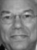

In [ ]:
#cv2.imshow 함수를 cv2_imshow로 변경
from google.colab.patches import cv2_imshow
cv2_imshow(img)

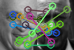

In [ ]:
img1 = cv2.imread(traina['Ariel'][0], 0)
img2 = cv2.imread(traina['Ariel'][1], 0)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

#bf = cv2.BFMatcher_create()
#bf = cv2.BFMatcher()
#matches = bf.knnMatch(des1, des2, k=2)
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = matcher.match(des1, des2)

'''
good = []
for m, n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)'''

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(img3)

In [ ]:
matches

(<DMatch 0x7f2d0f4f8db0>,
 <DMatch 0x7f2d0f4f8af0>,
 <DMatch 0x7f2d0f4f8d30>,
 <DMatch 0x7f2d0f4f8d10>,
 <DMatch 0x7f2d0f4f8b10>,
 <DMatch 0x7f2d0f4f8730>,
 <DMatch 0x7f2d0f4f8c90>,
 <DMatch 0x7f2d0f4f8170>,
 <DMatch 0x7f2d0f4f8d50>,
 <DMatch 0x7f2d0f4f8890>,
 <DMatch 0x7f2d0f4f86f0>,
 <DMatch 0x7f2d0f4f8dd0>)

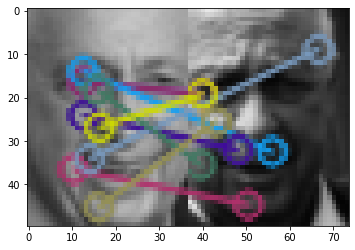

(<matplotlib.image.AxesImage at 0x7f2d13332590>, None)

In [ ]:
img1 = cv2.imread(traina['Ariel'][0], 0)
img2 = cv2.imread(traina['Ariel'][1], 0)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=32)

matcher = cv2.FlannBasedMatcher(index_params, search_params)

matches = matcher.match(des1, des2)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3, 'gray'), plt.show()

In [ ]:
matches

(<DMatch 0x7f2d106955d0>,
 <DMatch 0x7f2d10695230>,
 <DMatch 0x7f2d10695190>,
 <DMatch 0x7f2d10695030>,
 <DMatch 0x7f2d10695d70>,
 <DMatch 0x7f2d10695d90>,
 <DMatch 0x7f2d10695b70>,
 <DMatch 0x7f2d10695d10>,
 <DMatch 0x7f2d106958f0>,
 <DMatch 0x7f2d10695e10>,
 <DMatch 0x7f2d10695fd0>,
 <DMatch 0x7f2d10695310>,
 <DMatch 0x7f2d106950f0>,
 <DMatch 0x7f2d10695b10>,
 <DMatch 0x7f2d10695c70>,
 <DMatch 0x7f2d10695250>,
 <DMatch 0x7f2d106954f0>,
 <DMatch 0x7f2d10695510>,
 <DMatch 0x7f2d10695a10>,
 <DMatch 0x7f2d106957b0>,
 <DMatch 0x7f2d10695b90>,
 <DMatch 0x7f2d10695cf0>,
 <DMatch 0x7f2d10695590>,
 <DMatch 0x7f2d10695dd0>,
 <DMatch 0x7f2d10695db0>,
 <DMatch 0x7f2d10695370>,
 <DMatch 0x7f2d10695550>,
 <DMatch 0x7f2d106959d0>)

In [ ]:
img.shape

(50, 37)

매칭 - BMFMatcher

In [ ]:
img = cv2.imread(test.iloc[i][0], 0)
img

array([[164, 162, 162, ..., 181, 120,  95],
       [157, 157, 161, ..., 191, 135,  94],
       [150, 151, 156, ..., 198, 160, 102],
       ...,
       [ 14,  16,  18, ...,  19,  16,  13],
       [ 14,  15,  20, ...,  18,  17,  15],
       [ 16,  17,  18, ...,  19,  17,  15]], dtype=uint8)

In [ ]:
np.uint8(a_train)

array([[ 10,  12,   0, ...,   2,   6, 254],
       [  7, 247,   0, ..., 254,   0,   6],
       [247,   6, 249, ...,   0,   0, 254],
       ...,
       [248,  20, 248, ...,   0,   2, 251],
       [  6, 253, 252, ..., 254,   2, 254],
       [242,   2,   2, ...,   1, 254, 253]], dtype=uint8)

In [ ]:
np_pred = []
np_true = []

for i in test.index: #모든 테스트 데이터셋에 대해서 
  label = test.iloc[i][1]
  np_true.append(label)
  img = cv2.imread(test.iloc[i][0], 0)  #pca를 하지 않은 테스트 이미지 
  distance = []

  sift = cv2.xfeatures2d.SIFT_create()
  kp1, des1 = sift.detectAndCompute(img, None)
  kp2, des2 = sift.detectAndCompute(np.uint8(a_train), None)  #a_train 
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(c_train), None) #c_train
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(d_train), None) #d_train
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(s_train), None) #s_train 
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(w_train), None) #w_train 
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(h_train), None) #h_train
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(t_train), None) #t_train
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  min_idx = distance.index(min(distance))
  np_pred.append(min_idx+1)
  

In [ ]:
np_pred

매칭2 - FlannBasedMatcher

In [ ]:
np_pred2 = []
np_true = []

for i in test.index: #모든 테스트 데이터셋에 대해서 
  label = test.iloc[i][1]
  np_true.append(label)
  img = cv2.imread(test.iloc[i][0], 0)  #pca를 하지 않은 테스트 이미지 
  distance = []

  sift = cv2.xfeatures2d.SIFT_create()
  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
  search_params = dict(checks=32) 
  kp1, des1 = sift.detectAndCompute(img, None)
  kp2, des2 = sift.detectAndCompute(np.uint8(a_train), None)  #a_train 
  
  matcher = cv2.FlannBasedMatcher(index_params, search_params)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(c_train), None) #c_train
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(d_train), None) #d_train
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(s_train), None) #s_train 
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(w_train), None) #w_train 
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(h_train), None) #h_train
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(t_train), None) #t_train
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  min_idx = distance.index(min(distance))
  np_pred2.append(min_idx+1)

In [ ]:
np_pred2

매트릭스 계산 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [ ]:
conf_mat = confusion_matrix(np_true, np_pred)
conf_mat

array([[63,  0,  0, 21,  7,  0],
       [62,  0,  0, 20, 62, 14],
       [15,  0,  1,  3,  5,  3],
       [22,  0,  0,  8,  9,  7],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

In [ ]:
precision = precision_score(np_true, np_pred, average='micro')
recall = recall_score(np_true, np_pred, average='micro')
print(precision, recall)

0.2236024844720497 0.2236024844720497


In [ ]:
conf_mat.sum()

322

In [ ]:
tp_sum = conf_mat.diagonal().sum()
fp_sum = conf_mat.sum() - tp_sum
fn_sum = conf_mat.sum() - tp_sum
tn_sum = (len(conf_mat)-2) * conf_mat.sum() * tp_sum 

In [ ]:
FAR = fp_sum/conf_mat.sum()
FAR = fp_sum/(tn_sum+fp_sum)
FRR = fn_sum / (fn_sum+tp_sum)

In [ ]:
print(FAR, FRR)

0.002688576774998387 0.7763975155279503


본인얼굴 

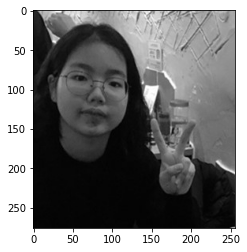

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/myface.jpg', 0)
plt.imshow(img, cmap='gray')

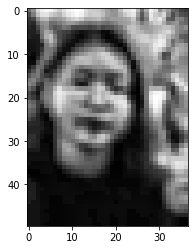

In [ ]:
# 전처리 
img_cut = img[:50*5, : 37*5] 
img_re = cv2.resize(img_cut, (37, 50))
img_g = cv2.GaussianBlur(img_re, (3, 3), 0) 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_cl = clahe.apply(img_g)
plt.imshow(img_cl, cmap='gray')

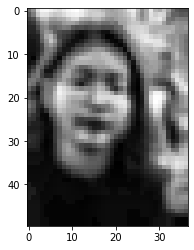

In [ ]:
# 전처리 interpolation=cv2.INTER_AREA
img_cut = img[:50*5, : 37*5] 
img_re = cv2.resize(img_cut, (37, 50), interpolation=cv2.INTER_AREA)
img_g = cv2.GaussianBlur(img_re, (3, 3), 0) 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_cl = clahe.apply(img_g)
plt.imshow(img_cl, cmap='gray')

In [ ]:
img = img_cl
distance = []

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(np.uint8(a_train), None)  #a_train 
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)  
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(c_train), None) #c_train
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(d_train), None) #d_train
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(s_train), None) #s_train 
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(w_train), None) #w_train 
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(h_train), None) #h_train
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(t_train), None) #t_train
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

min_idx = distance.index(min(distance)) + 1
min_idx

4